*   Nikhil Shegokar
*   233
*   AIML5
*   T218005
*   0120190079







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.dtypes

df.describe()

df.isna().sum()

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df_duplicates = df[df.duplicated()]
df_duplicates

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f523ccd2e90>,
      dtype=object)

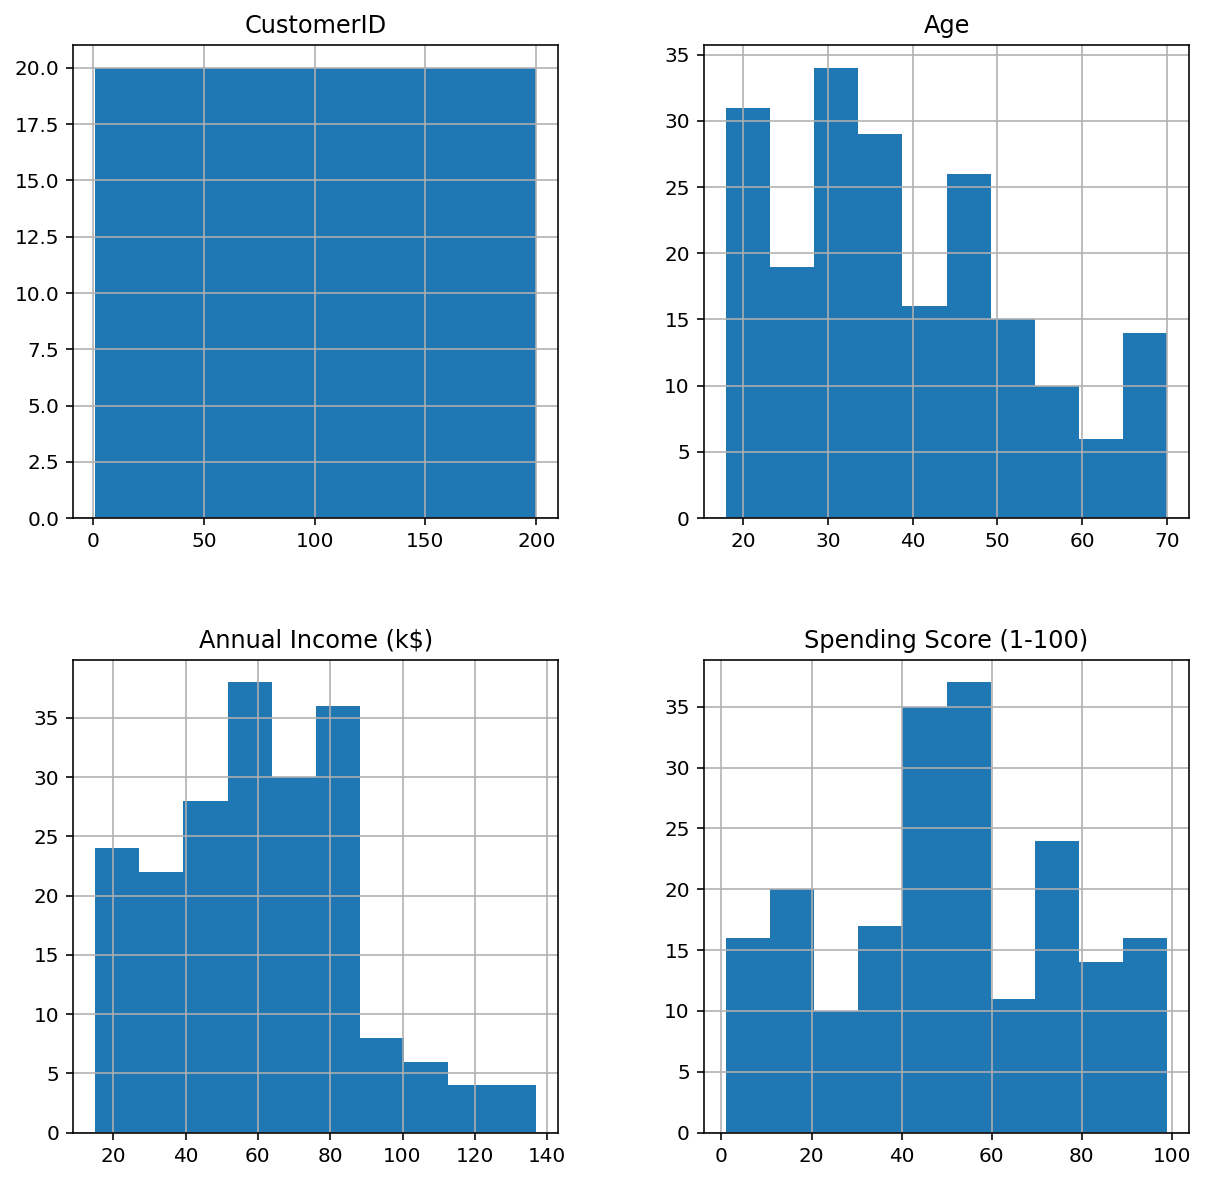

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


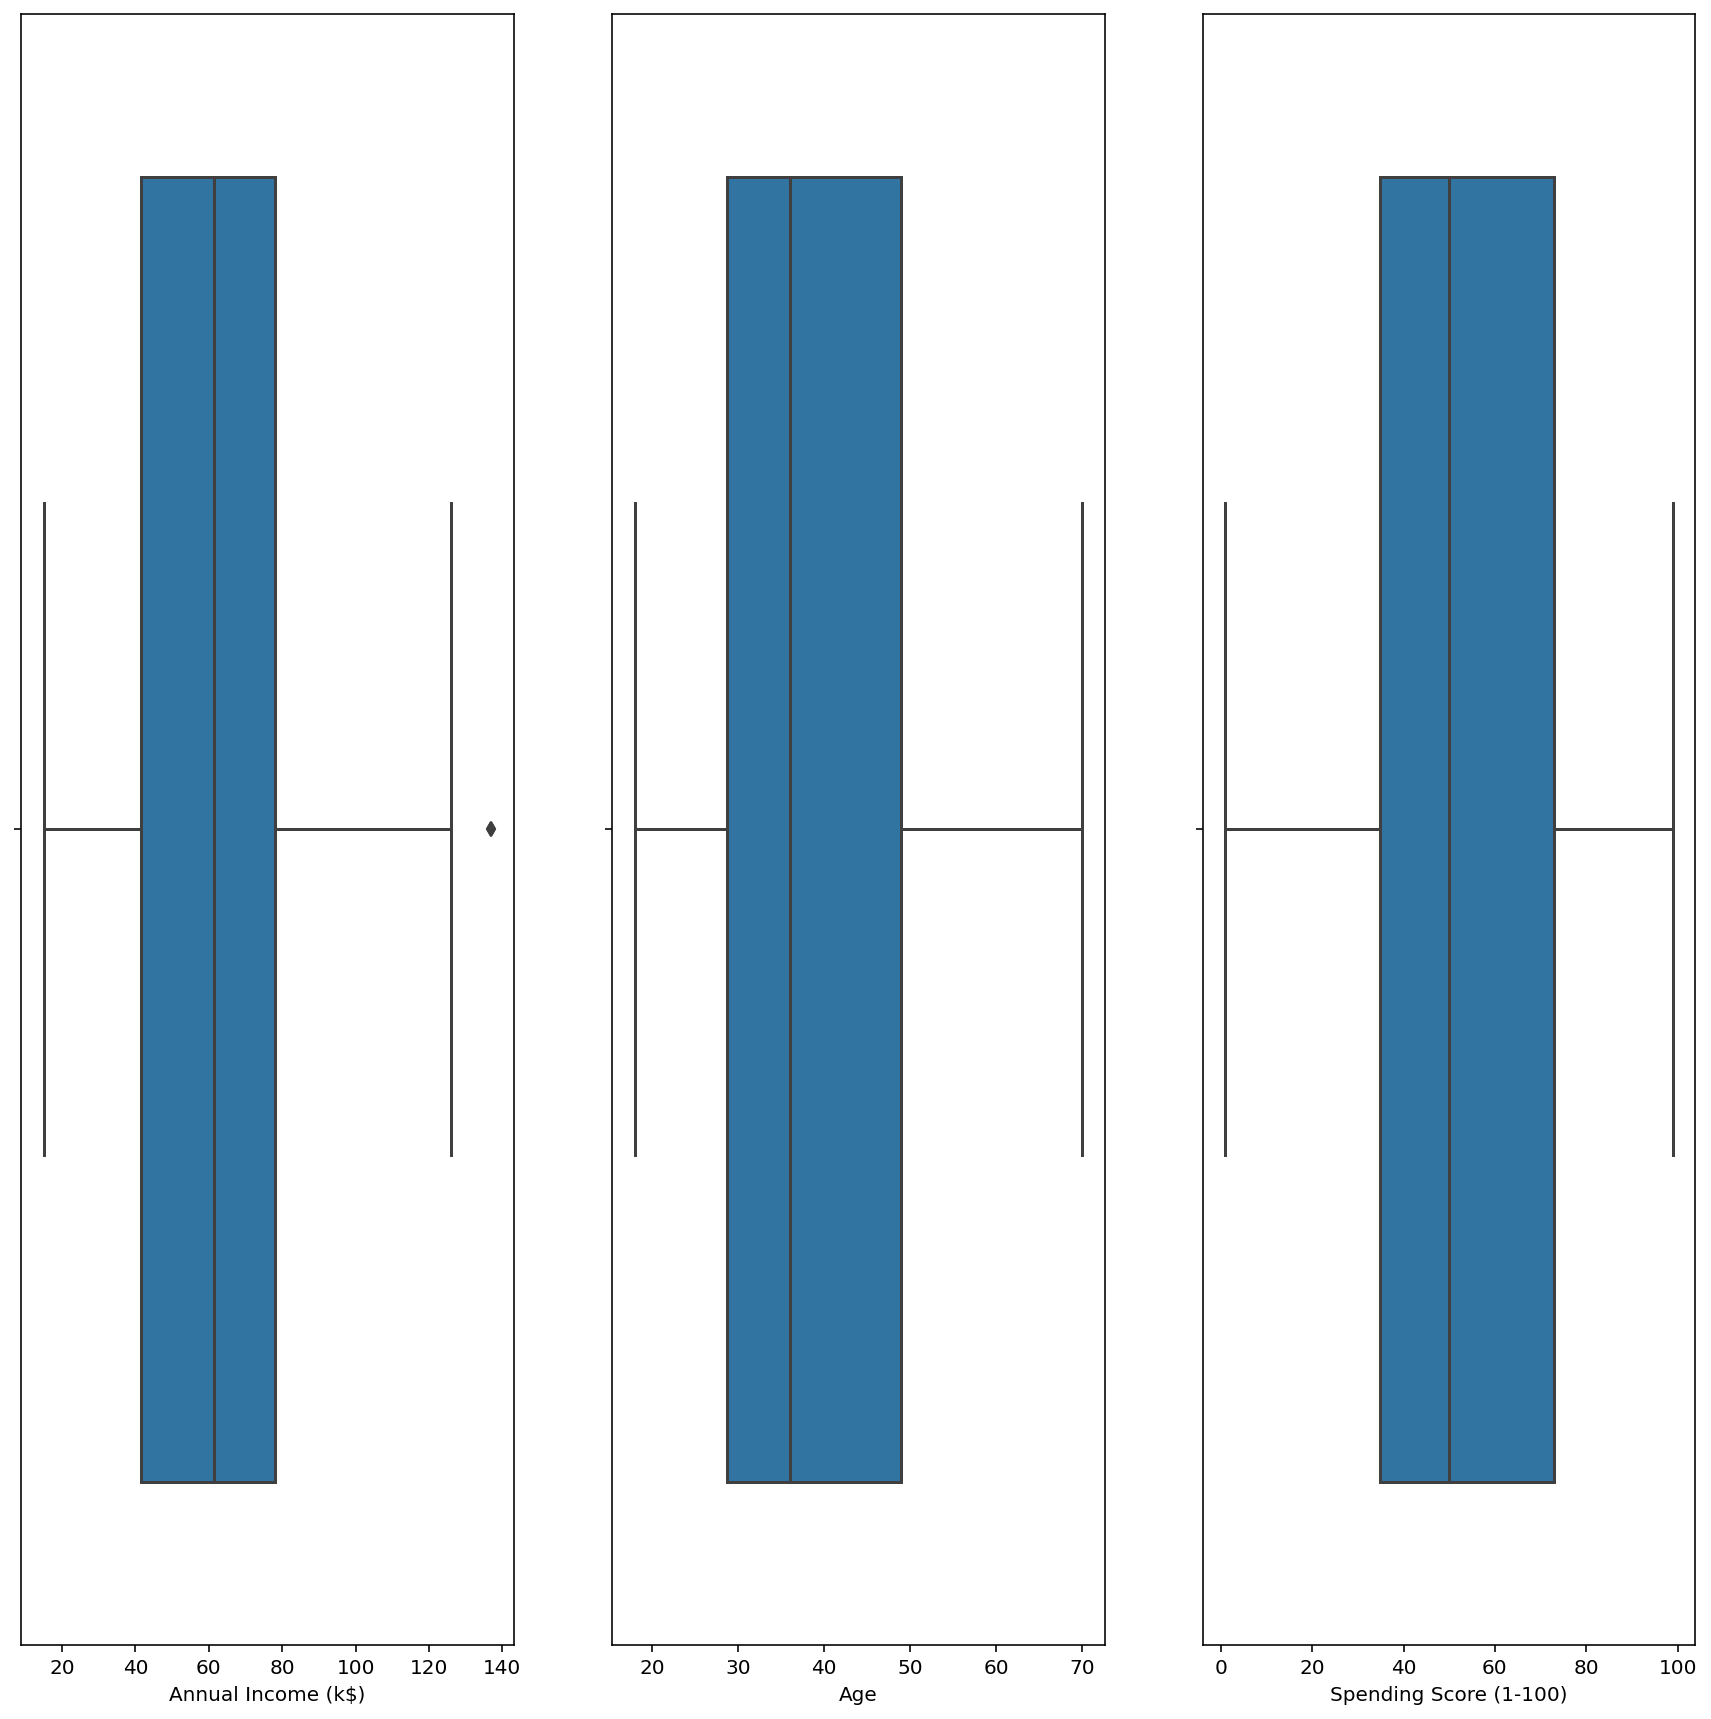

In [ ]:
f, axes = plt.subplots(1, 3,figsize=(15,15))
sns.boxplot(df['Annual Income (k$)'],  orient='v' , ax=axes[0])
sns.boxplot(df.Age,  orient='v' , ax=axes[1])
sns.boxplot(df['Spending Score (1-100)'],  orient='v' , ax=axes[2])

In [ ]:
outl = df[df['Annual Income (k$)'] > 130]
outl

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


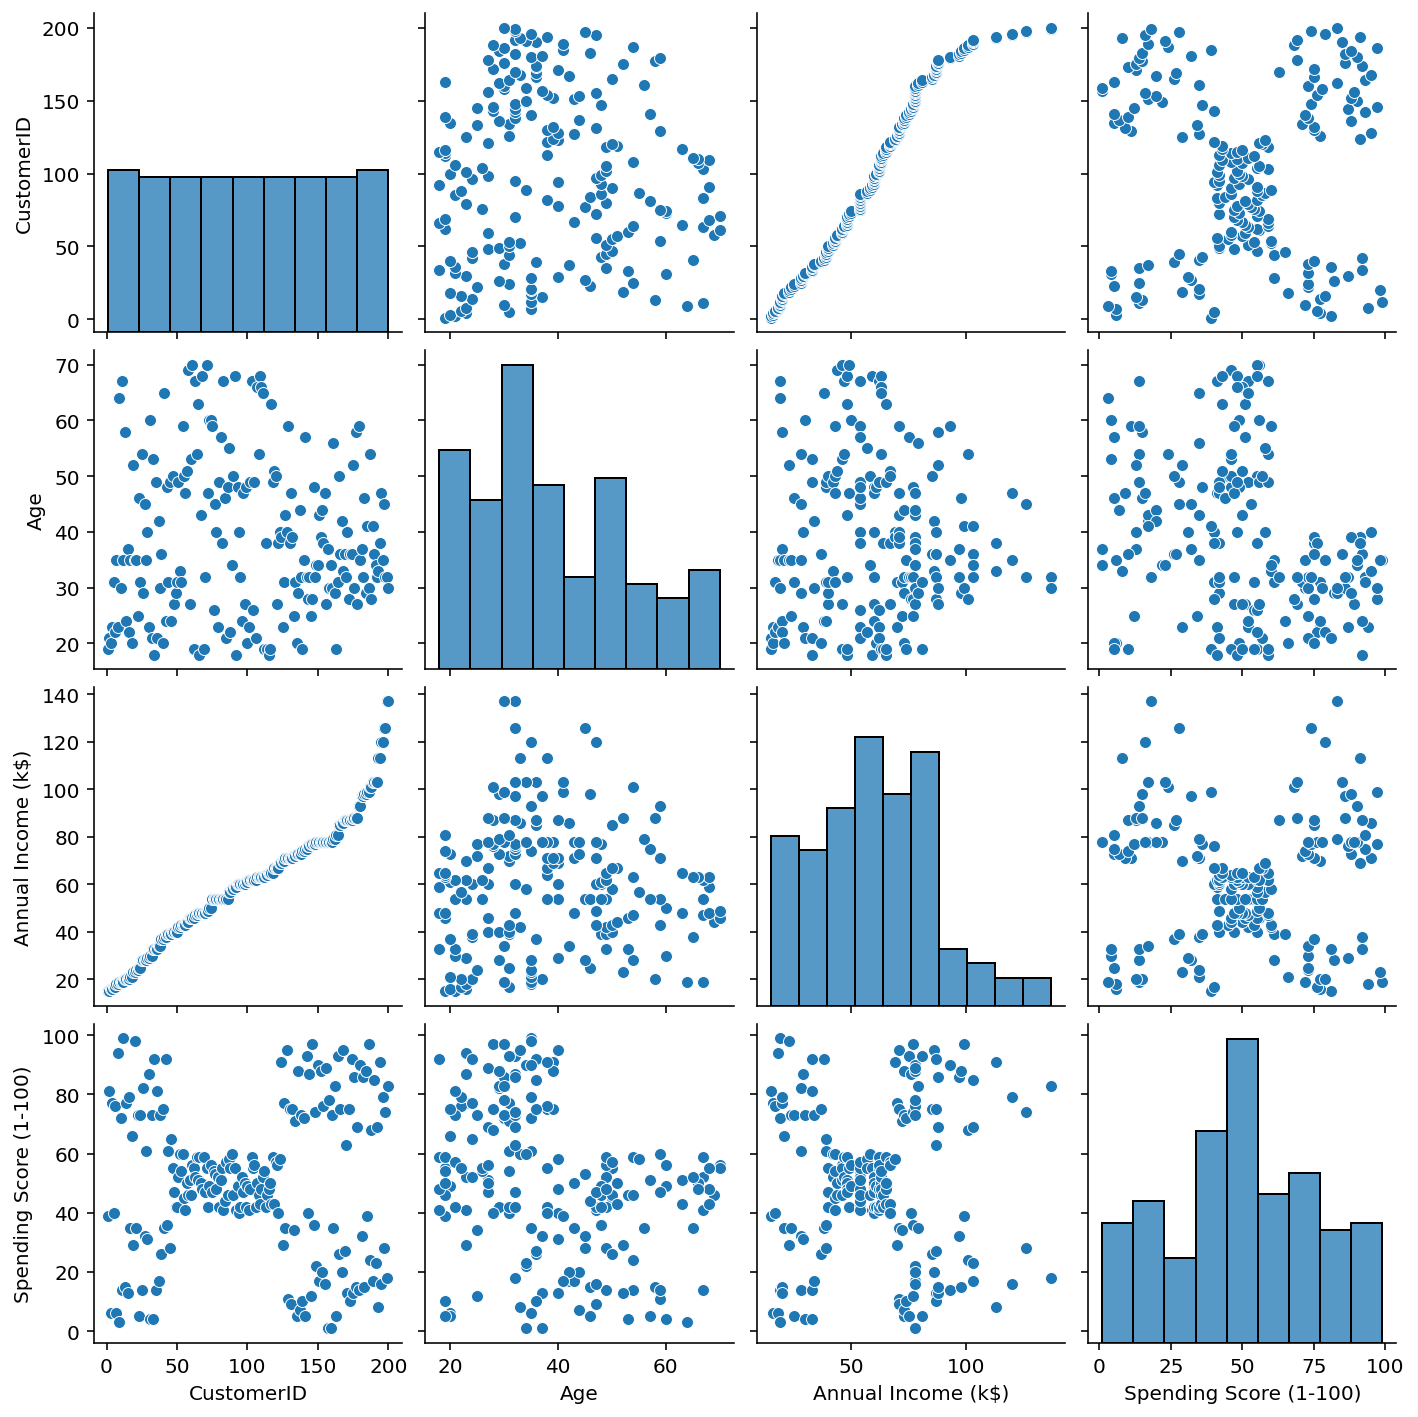

In [ ]:
sns.pairplot(df)

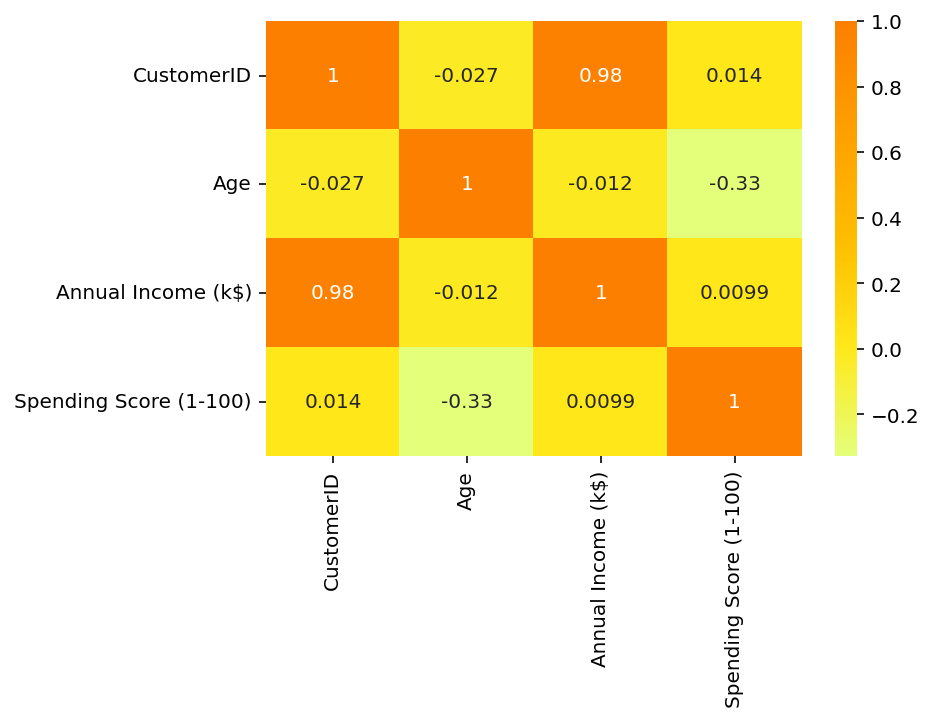

In [ ]:
corr = df.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [ ]:
df_dropped = df.drop(['CustomerID'], axis=1)
df_dropped.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df_dropped = pd.get_dummies(df_dropped, prefix=['Gender'])

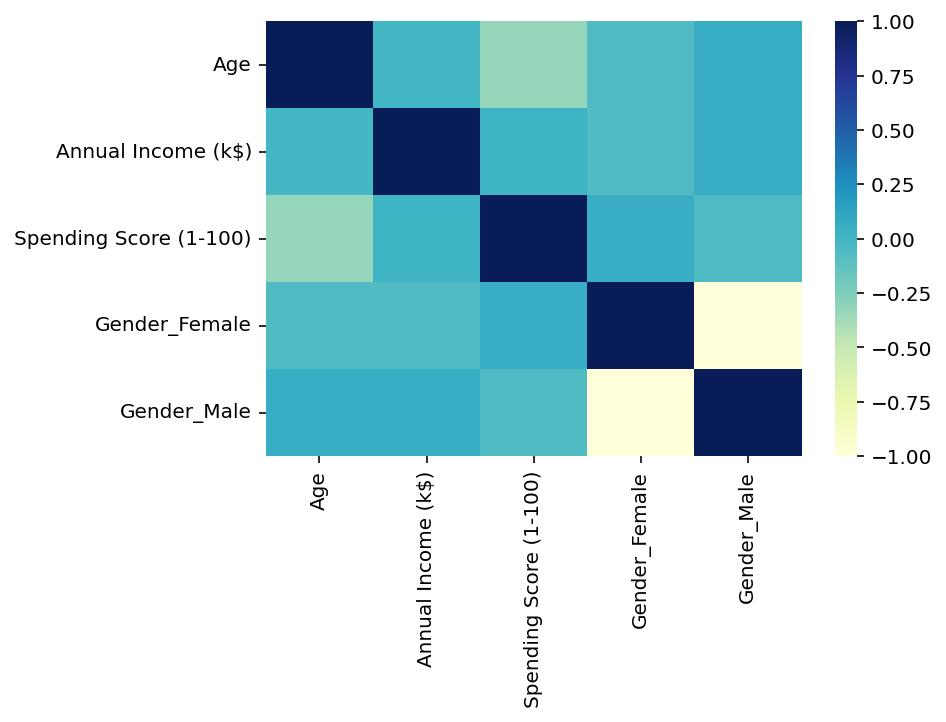

In [ ]:
df_dropped_corr = df_dropped.corr()

sns.heatmap(df_dropped_corr, cmap="YlGnBu")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dropped), columns = df_dropped.columns)
df_scaled.head()
df_scaled.describe()
df_dropped.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16,-8.437695e-17,1.554312e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,-1.128152e+00,-8.864053e-01
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,-1.128152e+00,-8.864053e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,8.864053e-01,-8.864053e-01
75%,7.284319e-01,6.656748e-01,8.851316e-01,8.864053e-01,1.128152e+00
max,2.235532e+00,2.917671e+00,1.894492e+00,8.864053e-01,1.128152e+00


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000,0.440000
std,13.969007,26.264721,25.823522,0.497633,0.497633
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000,0.000000
50%,36.000000,61.500000,50.000000,1.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000,1.000000


In [ ]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.7, min_samples=6)
model = cluster.fit(df_scaled)
df_scaled['labels_DBSCAN'] = model.labels_
df_scaled['labels_DBSCAN'].value_counts()

 0    69
-1    47
 2    23
 5    21
 4    11
 3    10
 7     9
 1     6
 6     4
Name: labels_DBSCAN, dtype: int64

In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score2 = silhouette_score (df_scaled, df_scaled['labels_DBSCAN'])
score2

0.4293463813670607

In [ ]:
sns.scatterplot(  y="Age", x= "Spending Score (1-100)", hue='labels_DBSCAN', data=df_scaled)

NameError: ignored